# What to expect

In notebook 2A we looked at the output of STAR, and combined the results for each sample in the <i>Schistosoma mansoni</i> example dataset into a single dataframe. We considered ways to normalise the gene count data and viewed the results using  Principal Component Analysis. In this second part of this session, you will repeat most of this process for your choice of dataset.

# Checking the quality of mapping
As before, take a look at the `analysis/<dataset>/multiqc/multiqc_report.html` by double-clicking.

<div class="alert alert-block alert-warning">

Answer the following questions. Your answers will be helpful to complete the bioinformatics analysis summary.

- What % of reads mapped to only one gene of the reference genome?
- Are there any samples that look less good? If so, in what way? How might this impact your results?

You can use this text cell to make notes, or add the answers straight into your analysis summary

\

\

\

# Combining data across samples

As with the example dataset in 2A, we have a set of files in the `star` folder. Each file contains the mapping result for that particular sample. Have a look at the mapping results for one of the samples

In [1]:
#Add code here to look at the mapping results for one sample in your dataset
! head -n 30 analysis/Trypanosoma/star/SRR7207625ReadsPerGeneUnst.out.tab

N_unmapped	2945577
N_multimapping	6040167
N_noFeature	1259531
N_ambiguous	152510
Tb04.24M18.150	137
Tb04.3I12.100	221
Tb05.30F7.410	118
Tb05.5K5.10	0
Tb05.5K5.100	16
Tb05.5K5.110	284
Tb05.5K5.120	132
Tb05.5K5.130	920
Tb05.5K5.140	31
Tb05.5K5.150	348
Tb05.5K5.160	86
Tb05.5K5.170	9
Tb05.5K5.180	51
Tb05.5K5.190	452
Tb05.5K5.20	384
Tb05.5K5.200	109
Tb05.5K5.210	647
Tb05.5K5.220	502
Tb05.5K5.230	103
Tb05.5K5.240	272
Tb05.5K5.250	73
Tb05.5K5.260	1200
Tb05.5K5.270	186
Tb05.5K5.280	727
Tb05.5K5.290	68
Tb05.5K5.30	410


To analyse the data further, we need to combine the results form each sample in one dataframe, which will be our master dataframe.  

The dataframe should have the gene name as index, and a column of reads per gene for each sample. Each column should have the accession number of that sample as column name. 

<div class="alert alert-block alert-warning">

Take the code you used in notebook 2A to generate the master dataframe for the example dataset and modify it as required to create the master dataframe for your dataset.

In [2]:
# Using a loop, create the list with the accession numbers 
accessions = []
with open("data/Trypanosoma/list_ids.txt", "r") as file:
    for line in file:
            accessions.append(line.strip())
# have a look at the list to check it all worked well
accessions

['SRR7207625',
 'SRR7207626',
 'SRR7207627',
 'SRR7207628',
 'SRR7207629',
 'SRR7207630',
 'SRR7207631',
 'SRR7207632',
 'SRR7207633',
 'SRR7207634',
 'SRR7207635',
 'SRR7207636',
 'SRR7207637',
 'SRR7207638',
 'SRR7207639',
 'SRR7207640',
 'SRR7207641',
 'SRR7207642']

In [8]:
# Import pandas
import pandas as pd

# Create the master dataframe
master_df = pd.DataFrame()

# Use a loop to add the index and the data to the master_df
for accession in accessions:
    print(accession)
    file = f"analysis/Trypanosoma/star/{accession}ReadsPerGeneUnst.out.tab"
    counts_df = pd.read_csv(file, index_col=0, sep="\t", names=["gene", "reads"])
    counts_df[accession] = counts_df["reads"]
    accession_df = counts_df[[accession]]
    master_df = master_df.join(accession_df, how='outer')
        
# Have a look at the master_df
master_df

SRR7207625
SRR7207626
SRR7207627
SRR7207628
SRR7207629
SRR7207630
SRR7207631
SRR7207632
SRR7207633
SRR7207634
SRR7207635
SRR7207636
SRR7207637
SRR7207638
SRR7207639
SRR7207640
SRR7207641
SRR7207642


,SRR7207625,SRR7207626,SRR7207627,SRR7207628,SRR7207629,SRR7207630,SRR7207631,SRR7207632,SRR7207633,SRR7207634,SRR7207635,SRR7207636,SRR7207637,SRR7207638,SRR7207639,SRR7207640,SRR7207641,SRR7207642
gene,,,,,,,,,,,,,,,,,,
N_ambiguous,152510.0,153653.0,146615.0,178486.0,175564.0,173946.0,31159.0,32312.0,33236.0,33371.0,35786.0,35464.0,27547.0,28352.0,34691.0,34772.0,31620.0,32310.0
N_multimapping,6040167.0,6189469.0,5935727.0,6134202.0,6025975.0,6034453.0,6042552.0,6083753.0,6306607.0,6335806.0,6504261.0,6520231.0,5562816.0,5573768.0,6505340.0,6528173.0,6097773.0,6124302.0
N_noFeature,1259531.0,1241490.0,1203232.0,1465279.0,1467787.0,1464097.0,5371516.0,5377276.0,5517052.0,5532341.0,5721661.0,5720984.0,4745161.0,4747900.0,5564288.0,5588386.0,5234020.0,5245006.0
N_unmapped,2945577.0,2896291.0,2995008.0,770785.0,744276.0,787076.0,1402251.0,1409155.0,1418119.0,1424336.0,1532918.0,1536588.0,1442131.0,1448601.0,1874046.0,1885538.0,1643416.0,1648151.0
Tb04.24M18.150,137.0,171.0,195.0,254.0,250.0,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmp.1.50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tmp.1.60,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tmp.1.70,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You will hopefully notice that the first few rows are not helpful for our analysis, and that we have a lot of empty values (NaN)

<div class="alert alert-block alert-warning">

Clean the dataframe to remove irrelevant rows and to replace empty values (NaN) with 0

In [11]:
# Clean the dataframe to make sure it is ready for the next step of the analysis
master_df_clean = master_df.iloc[4:]
master_df_clean.fillna(0,inplace=True)
# Have a look at the cleaned master_df
master_df_clean

/tmp/ipykernel_30146/2434048863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_clean.fillna(0,inplace=True)


,SRR7207625,SRR7207626,SRR7207627,SRR7207628,SRR7207629,SRR7207630,SRR7207631,SRR7207632,SRR7207633,SRR7207634,SRR7207635,SRR7207636,SRR7207637,SRR7207638,SRR7207639,SRR7207640,SRR7207641,SRR7207642
gene,,,,,,,,,,,,,,,,,,
Tb04.24M18.150,137.0,171.0,195.0,254.0,250.0,191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb04.3I12.100,221.0,194.0,160.0,244.0,256.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.30F7.410,118.0,228.0,80.0,80.0,39.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.5K5.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.5K5.100,16.0,8.0,12.0,35.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmp.1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tmp.1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tmp.1.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-warning">

Take a few moments to look at the dataframe and compare it with the one the rest of your group obtained. Did you get the same output? Does it look like the one shown on the projector? If not, try to figure out why, and feel free to ask your peers and the demonstrators for help.

In [12]:
# Save the dataframe as a csv file so we can look at it later
master_df_clean.to_csv(f"analysis/Trypanosoma/star/ReadsPerGene.csv")

# Normalisation
As with the example dataset, we will now use the python package [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/api/index.html) to normalise our gene counts and quantify the log fold change.

As before, we will need a counts table and a metadata table. For each dataset we have provided metadata in `data/<dataset>/metadata.csv`, so we just need to read that into a dataframe

In [13]:
#create the counts matrix by transposing our master_df
counts = master_df_clean.T

#create the metadata table. The index should be the accession number.
metadata = pd.read_csv("data/Trypanosoma/metadata.csv", index_col=0)

# Let's have a look at the metadata to make sure it looks right.
metadata

,biosample,condition,organism,morphology
accession,,,,
SRR7207625,SAMN09241945,ascending,Trypanosoma brucei brucei,slender
SRR7207626,SAMN09241944,ascending,Trypanosoma brucei brucei,slender
SRR7207627,SAMN09241943,ascending,Trypanosoma brucei brucei,slender
SRR7207628,SAMN09241942,peak,Trypanosoma brucei brucei,stumpy
SRR7207629,SAMN09241941,peak,Trypanosoma brucei brucei,stumpy
SRR7207630,SAMN09241940,peak,Trypanosoma brucei brucei,stumpy
SRR7207631,SAMN09241939,ascending,Trypanosoma congolense,mono
SRR7207632,SAMN09241939,ascending,Trypanosoma congolense,mono
SRR7207633,SAMN09241938,ascending,Trypanosoma congolense,mono


Hopefully you have noticed that the experiment in your dataset is a bit more complex than that in the example dataset. In your dataset, there are other variables (different genotypes for Plasmodium, different species for Trypanosoma). However, we do not need the data for all the experimental conditons for our analysis, because:
- For <i>Plasmodium</i>, we only want to compare the wildtype at the different timepoints.
- For <i>Trypanosoma</i>, we only want to compare <i>Trypanosoma brucei brucei</i> with different morphologies.

Therefore, we have to create a filtered version of the metadata (metadata_s) and counts (counts_s) to use with PyDESeq2, so that they only contain the conditions we are interested in. We practised how to do this in notebook 1. 

<div class="alert alert-block alert-warning">
    
Create the counts and the metadata tables so that they only contain the conditions we want to compare.

In [14]:
#add code below to create the filtered dataframes
counts_s = counts[metadata["organism"].isin(["Trypanosoma brucei brucei"])]
metadata_s = metadata[metadata["organism"].isin(["Trypanosoma brucei brucei"])]


Now, we are ready to generate the DeseqDataSet object using the relevant `design` and apply the deseq2 method.

<div class="alert alert-block alert-warning">
    
Fill in the code below with the relevant design factor for your analysis.

In [15]:
! pip install --quiet pydeseq2
from pydeseq2.dds import DeseqDataSet

dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    refit_cooks=True,
    design="morphology"
)

dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.37 seconds.

Fitting dispersion trend curve...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 4.63 seconds.

Fitting LFCs...
... done in 2.40 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



# PCA Plot

Now take a look at how the overall data looks on a Principal Component Analysis plot of PC1 and PC2. 

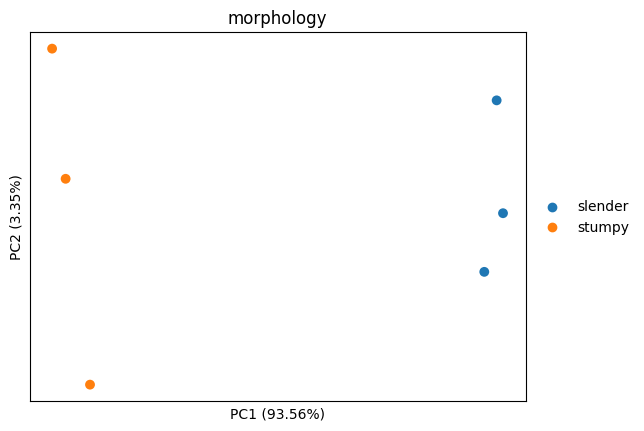

In [16]:
! pip install --quiet scanpy
import scanpy as sc

sc.tl.pca(dds)
sc.pl.pca(dds, color="morphology", size=200, annotate_var_explained=True)

<div class="alert alert-block alert-warning">

Answer the following questions. Your answers will be helpful to complete the bioinformatics analysis summary.

- Is there a separation between the groups?
- Does reproducibility look good?
- What is PC1 separating?
- What is PC2 separating?

You can use this text cell to make notes, or add the answers straight into your analysis summary

\

\

\

Look at the loadings associated with the two components.

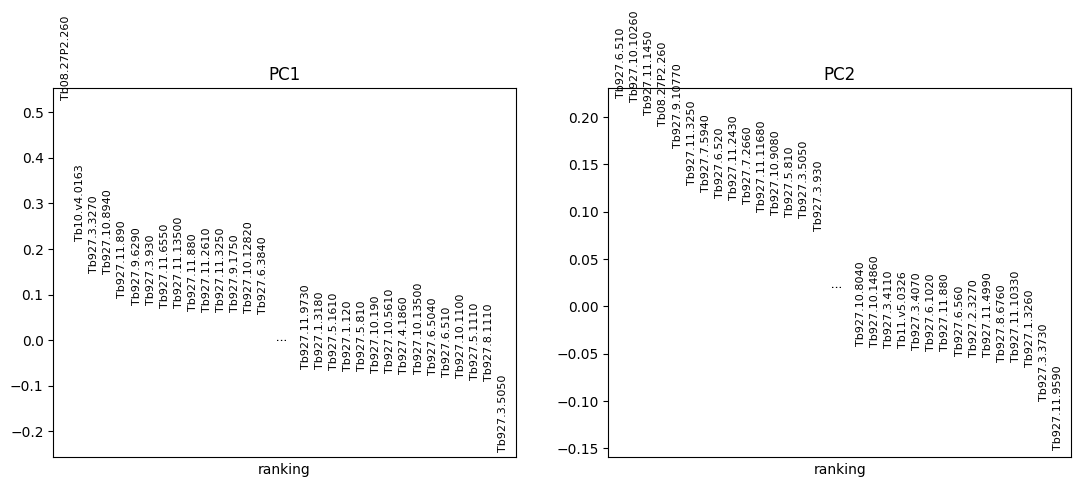

In [17]:
sc.pl.pca_loadings(dds, components = '1,2')

<div class="alert alert-block alert-warning">

Answer the following question. Your answer will be helpful to complete the bioinformatics analysis summary.

What is the top ranked gene for each component? What do these genes encode?

You can use this text cell to make notes, or add the answers straight into your analysis summary

\

\

\